# Telecom Churn Case Study

In [1]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import and understand data

In [3]:
#read the dataset
churn = pd.read_csv('telecom_churn_data.csv')

In [4]:
#look at the first few entries
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
#shape of the dataset
churn.shape

(99999, 226)

In [6]:
#check the summary of the dataset
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


## Handling missing data

In [7]:
#check the number of missing values in each column
churn.isnull().sum()

mobile_number               0
circle_id                   0
loc_og_t2o_mou           1018
std_og_t2o_mou           1018
loc_ic_t2o_mou           1018
last_date_of_month_6        0
last_date_of_month_7      601
last_date_of_month_8     1100
last_date_of_month_9     1659
arpu_6                      0
arpu_7                      0
arpu_8                      0
arpu_9                      0
onnet_mou_6              3937
onnet_mou_7              3859
onnet_mou_8              5378
onnet_mou_9              7745
offnet_mou_6             3937
offnet_mou_7             3859
offnet_mou_8             5378
offnet_mou_9             7745
roam_ic_mou_6            3937
roam_ic_mou_7            3859
roam_ic_mou_8            5378
roam_ic_mou_9            7745
roam_og_mou_6            3937
roam_og_mou_7            3859
roam_og_mou_8            5378
roam_og_mou_9            7745
loc_og_t2t_mou_6         3937
                        ...  
arpu_2g_9               74077
night_pck_user_6        74846
night_pck_

In [8]:
#percentage of missing values in all columns
obj = round(100*(churn.isnull().sum()/len(churn.index)), 2)
for key,value in obj.iteritems():
    print(key,",",value)

mobile_number , 0.0
circle_id , 0.0
loc_og_t2o_mou , 1.02
std_og_t2o_mou , 1.02
loc_ic_t2o_mou , 1.02
last_date_of_month_6 , 0.0
last_date_of_month_7 , 0.6
last_date_of_month_8 , 1.1
last_date_of_month_9 , 1.66
arpu_6 , 0.0
arpu_7 , 0.0
arpu_8 , 0.0
arpu_9 , 0.0
onnet_mou_6 , 3.94
onnet_mou_7 , 3.86
onnet_mou_8 , 5.38
onnet_mou_9 , 7.75
offnet_mou_6 , 3.94
offnet_mou_7 , 3.86
offnet_mou_8 , 5.38
offnet_mou_9 , 7.75
roam_ic_mou_6 , 3.94
roam_ic_mou_7 , 3.86
roam_ic_mou_8 , 5.38
roam_ic_mou_9 , 7.75
roam_og_mou_6 , 3.94
roam_og_mou_7 , 3.86
roam_og_mou_8 , 5.38
roam_og_mou_9 , 7.75
loc_og_t2t_mou_6 , 3.94
loc_og_t2t_mou_7 , 3.86
loc_og_t2t_mou_8 , 5.38
loc_og_t2t_mou_9 , 7.75
loc_og_t2m_mou_6 , 3.94
loc_og_t2m_mou_7 , 3.86
loc_og_t2m_mou_8 , 5.38
loc_og_t2m_mou_9 , 7.75
loc_og_t2f_mou_6 , 3.94
loc_og_t2f_mou_7 , 3.86
loc_og_t2f_mou_8 , 5.38
loc_og_t2f_mou_9 , 7.75
loc_og_t2c_mou_6 , 3.94
loc_og_t2c_mou_7 , 3.86
loc_og_t2c_mou_8 , 5.38
loc_og_t2c_mou_9 , 7.75
loc_og_mou_6 , 3.94
loc_og_mo

In [9]:
#value counts of all the columns
for column in churn:
    print(churn[column].astype('category').value_counts())
    print('___________________________________________________')

7002410905    1
7000807788    1
7000807366    1
7000807373    1
7000807378    1
7000807385    1
7000807411    1
7000807416    1
7000807418    1
7000807423    1
7000807451    1
7000807453    1
7000807468    1
7000807514    1
7000807550    1
7000807578    1
7000807608    1
7000807616    1
7000807644    1
7000807670    1
7000807732    1
7000807744    1
7000807747    1
7000807356    1
7000807290    1
7000807200    1
7000806875    1
7000806519    1
7000806531    1
7000806534    1
             ..
7001610068    1
7001610105    1
7001610162    1
7001610182    1
7001610235    1
7001609661    1
7001609614    1
7001609214    1
7001609405    1
7001609243    1
7001609264    1
7001609270    1
7001609273    1
7001609286    1
7001609334    1
7001609363    1
7001609369    1
7001609370    1
7001609445    1
7001609596    1
7001609459    1
7001609483    1
7001609515    1
7001609517    1
7001609525    1
7001609545    1
7001609553    1
7001609562    1
7001609584    1
7000000074    1
Name: mobile_number, Len

0.00      10827
1.01         86
0.38         75
0.41         73
0.36         71
0.53         69
0.26         69
0.01         64
0.61         63
0.51         63
0.48         63
0.23         63
0.03         62
0.40         62
0.68         60
0.28         60
0.43         59
1.06         59
0.46         59
0.76         59
0.20         58
0.21         58
0.16         58
0.33         58
0.35         58
0.81         57
0.73         57
0.31         57
0.63         57
0.45         56
          ...  
377.61        1
377.71        1
377.73        1
377.74        1
377.83        1
377.88        1
378.01        1
378.08        1
378.11        1
377.14        1
377.11        1
377.08        1
376.79        1
376.33        1
376.49        1
376.51        1
376.58        1
376.66        1
376.73        1
376.74        1
376.83        1
377.06        1
376.84        1
376.89        1
376.94        1
376.96        1
376.98        1
377.01        1
377.04        1
220.86        1
Name: onnet_mou_9, Lengt

0.00       15994
0.33         133
0.48         119
0.31         105
0.26         105
0.43         104
0.36         103
0.41         101
0.30         101
0.28         100
0.38          99
0.83          98
1.01          97
0.58          95
0.68          94
0.46          94
0.45          94
0.98          93
0.53          93
1.06          91
1.56          91
0.76          90
0.35          90
0.51          90
2.01          89
0.66          88
1.13          88
0.25          88
0.01          88
0.21          88
           ...  
71.41          1
183.13         1
183.09         1
71.49          1
183.08         1
183.71         1
183.79         1
70.33          1
184.54         1
185.14         1
185.06         1
184.99         1
184.88         1
184.86         1
184.84         1
184.74         1
184.61         1
184.59         1
184.53         1
183.89         1
184.51         1
184.33         1
184.31         1
184.28         1
184.23         1
70.79          1
184.11         1
183.98        

0.00       7998
0.03         43
0.56         39
2.48         38
0.33         38
1.01         36
0.01         35
0.38         34
0.36         33
0.93         33
0.51         33
0.41         33
0.40         33
0.71         33
0.20         32
2.76         32
0.28         32
0.30         31
1.56         31
0.61         31
0.18         31
0.68         30
0.21         30
0.35         30
0.48         30
1.16         29
0.98         29
0.96         29
1.11         29
0.53         29
           ... 
355.46        1
355.49        1
355.54        1
355.58        1
138.81        1
355.69        1
354.98        1
354.94        1
354.91        1
354.88        1
354.08        1
139.64        1
354.09        1
139.61        1
354.16        1
139.56        1
354.18        1
354.21        1
354.23        1
354.26        1
354.33        1
354.48        1
354.54        1
354.58        1
354.63        1
354.68        1
354.76        1
139.29        1
354.81        1
7674.78       1
Name: loc_og_mou_7, Leng

Name: std_og_t2f_mou_7, Length: 2391, dtype: int64
___________________________________________________
0.00     83754
0.43        60
0.36        60
0.21        60
0.41        59
0.35        59
0.25        58
0.45        57
0.46        56
0.56        55
0.55        55
0.30        55
0.20        54
0.40        54
0.48        52
0.51        51
0.28        51
0.50        49
0.38        47
0.26        47
0.61        46
0.83        46
0.71        45
1.00        45
0.80        45
0.31        45
0.33        44
1.58        44
0.16        44
0.70        44
         ...  
26.16        1
26.14        1
25.43        1
25.06        1
25.08        1
25.11        1
25.14        1
25.16        1
25.18        1
25.19        1
25.24        1
25.29        1
25.35        1
25.36        1
25.39        1
25.49        1
26.09        1
25.51        1
25.54        1
25.55        1
25.58        1
25.59        1
25.69        1
25.73        1
25.83        1
25.91        1
25.98        1
26.03        1
26.08       

Name: spl_og_mou_9, Length: 4095, dtype: int64
___________________________________________________
0.00      79128
0.21        584
0.43        218
0.20        152
0.65        146
0.40        138
0.68        134
0.66        133
0.86        132
0.71        128
0.63        122
0.76        120
0.56        120
0.78        113
0.70        112
0.61        111
0.98        111
0.58        109
0.83        106
0.81        106
0.91        105
0.38        104
0.41        103
1.43        102
0.53        100
1.08         99
0.85         99
0.73         98
0.80         97
1.41         96
          ...  
12.14         1
8.41          1
13.01         1
12.04         1
12.03         1
12.01         1
11.99         1
8.43          1
8.44          1
11.96         1
12.33         1
12.35         1
12.36         1
12.38         1
8.04          1
12.89         1
12.86         1
12.78         1
8.05          1
12.74         1
12.68         1
12.66         1
12.61         1
8.18          1
8.26          1
12.54

0.00        11505
0.36          105
0.53           99
0.43           96
0.40           95
0.31           95
0.46           92
0.35           92
0.50           91
0.96           91
0.66           90
0.25           88
0.58           88
0.41           88
0.73           88
1.01           87
0.56           86
0.30           86
0.33           85
0.76           85
0.68           82
0.28           82
0.48           81
0.38           80
0.81           79
0.78           76
0.60           76
0.65           76
0.83           76
0.51           76
            ...  
178.76          1
178.68          1
178.64          1
178.61          1
178.51          1
178.48          1
178.46          1
179.58          1
179.66          1
179.76          1
180.41          1
180.94          1
180.93          1
180.89          1
180.81          1
180.78          1
180.76          1
180.58          1
180.51          1
180.38          1
179.83          1
180.19          1
180.18          1
180.13          1
180.06    

0.00     35854
0.25       261
0.41       256
0.26       247
0.45       241
0.35       239
0.30       233
0.46       232
0.31       232
0.23       231
0.33       230
0.38       230
0.28       229
0.53       227
0.40       220
0.48       218
0.43       216
0.21       209
0.56       206
0.51       204
0.36       197
0.18       194
0.68       192
0.50       189
0.66       186
0.63       183
0.20       178
0.78       176
0.91       175
0.61       173
         ...  
92.16        1
92.21        1
92.38        1
92.39        1
92.43        1
92.48        1
92.51        1
91.53        1
91.49        1
91.39        1
90.96        1
90.61        1
90.63        1
90.64        1
90.69        1
90.74        1
90.81        1
90.91        1
90.93        1
90.98        1
91.33        1
91.06        1
91.09        1
91.13        1
91.14        1
91.16        1
91.18        1
91.21        1
91.23        1
55.21        1
Name: loc_ic_t2f_mou_9, Length: 7091, dtype: int64
__________________________________

0.0    96062
Name: std_ic_t2o_mou_6, dtype: int64
___________________________________________________
0.0    96140
Name: std_ic_t2o_mou_7, dtype: int64
___________________________________________________
0.0    94621
Name: std_ic_t2o_mou_8, dtype: int64
___________________________________________________
0.0    92254
Name: std_ic_t2o_mou_9, dtype: int64
___________________________________________________
0.00       24166
0.31         181
0.43         179
0.33         178
0.03         173
0.41         163
0.35         162
0.36         162
0.26         160
0.30         159
0.28         155
0.23         150
0.51         148
0.38         146
0.18         143
0.21         140
0.48         139
0.25         135
0.53         129
0.58         129
0.46         127
0.61         127
0.68         126
0.76         125
0.20         124
0.56         124
0.45         124
0.71         123
0.63         123
0.78         121
           ...  
153.39         1
153.33         1
153.31         1
153.29        

Name: isd_ic_mou_7, Length: 5789, dtype: int64
___________________________________________________
0.00       78966
0.46         142
0.01         114
0.03         108
0.45          89
0.05          88
0.33          81
0.48          78
0.31          73
0.25          72
0.43          71
0.30          70
0.41          66
0.38          65
0.28          65
0.20          63
0.26          60
0.06          57
0.23          55
0.36          54
0.16          51
0.35          50
0.40          49
0.08          47
0.10          45
0.21          42
0.56          40
0.55          40
0.51          40
0.18          37
           ...  
92.49          1
92.53          1
92.19          1
35.56          1
35.59          1
35.61          1
91.41          1
36.14          1
91.49          1
36.11          1
91.56          1
36.01          1
91.58          1
35.96          1
91.69          1
35.89          1
91.83          1
91.88          1
91.98          1
35.79          1
35.78          1
35.76          1


130     18471
0       17956
50      10118
30       8733
150      2963
252      2770
20       2683
250      2178
175      2076
200      1761
149      1758
10       1736
144      1731
100      1531
36       1310
61       1190
154      1179
25       1131
42       1099
198      1038
67        983
98        655
65        622
145       620
152       580
41        527
169       515
179       455
550       454
350       440
        ...  
2010        3
78          3
295         3
531         3
5           2
2149        2
111         2
887         2
120         2
142         2
68          2
619         2
574         2
974         1
396         1
1           1
2199        1
81          1
298         1
299         1
600         1
999         1
650         1
39          1
1505        1
779         1
1479        1
1464        1
1100        1
547         1
Name: max_rech_amt_9, Length: 201, dtype: int64
___________________________________________________
6/30/2014    16960
6/29/2014    12918
6/27/201

154.0    3320
252.0    2022
198.0    1212
25.0     1055
17.0      835
98.0      773
50.0      759
23.0      661
145.0     661
304.0     539
504.0     514
179.0     501
46.0      391
92.0      341
175.0     340
100.0     309
274.0     274
196.0     260
34.0      253
115.0     251
69.0      250
149.0     247
308.0     232
75.0      227
125.0     222
91.0      211
150.0     205
200.0     199
14.0      169
41.0      165
         ... 
592.0       1
590.0       1
589.0       1
587.0       1
578.0       1
665.0       1
575.0       1
574.0       1
572.0       1
570.0       1
567.0       1
564.0       1
621.0       1
622.0       1
625.0       1
628.0       1
629.0       1
632.0       1
636.0       1
640.0       1
642.0       1
643.0       1
644.0       1
646.0       1
652.0       1
657.0       1
659.0       1
662.0       1
663.0       1
0.5         1
Name: av_rech_amt_data_8, Length: 973, dtype: int64
___________________________________________________
252.0    2105
175.0    1948
25.0     1339


0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64
___________________________________________________
0.0    24982
1.0      589
Name: night_pck_user_7, dtype: int64
___________________________________________________
0.0    25790
1.0      549
Name: night_pck_user_8, dtype: int64
___________________________________________________
0.0    25508
1.0      414
Name: night_pck_user_9, dtype: int64
___________________________________________________
0    92674
1     6728
2      562
3       28
4        7
Name: monthly_2g_6, dtype: int64
___________________________________________________
0    92435
1     6855
2      669
3       33
4        5
5        2
Name: monthly_2g_7, dtype: int64
___________________________________________________
0    92591
1     6775
2      586
3       37
4        8
5        2
Name: monthly_2g_8, dtype: int64
___________________________________________________
0    93735
1     5695
2      530
3       33
4        6
Name: monthly_2g_9, dtype: int64
__________

In [10]:
#number of rows where month 6 data values are missing and total data usage = 0
seriesObj = churn.apply(lambda x: True if (np.isnan(x['total_rech_data_6']) and np.isnan(x['max_rech_data_6']) 
                                           and np.isnan(x['count_rech_2g_6']) and np.isnan(x['count_rech_3g_6'])
                                           and np.isnan(x['av_rech_amt_data_6']) and np.isnan(x['arpu_3g_6'])
                                           and np.isnan(x['arpu_2g_6']) and np.isnan(x['night_pck_user_6']) 
                                           and np.isnan(x['fb_user_6']) and x['vol_2g_mb_6'] == 0 
                                           and x['vol_3g_mb_6'] == 0) else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index)
numOfRows

74846

In [11]:
#columns with missing values month 6
temp = ['total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6',
       'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'fb_user_6']

In [12]:
#replacing missing values with 0 as missing means 0
for col in temp:
    churn[col].fillna(0,inplace=True)

In [13]:
#value counts of all the columns
obj = round(100*(churn.isnull().sum()/len(churn.index)), 2)
for key,value in obj.iteritems():
    print(key,",",value)

mobile_number , 0.0
circle_id , 0.0
loc_og_t2o_mou , 1.02
std_og_t2o_mou , 1.02
loc_ic_t2o_mou , 1.02
last_date_of_month_6 , 0.0
last_date_of_month_7 , 0.6
last_date_of_month_8 , 1.1
last_date_of_month_9 , 1.66
arpu_6 , 0.0
arpu_7 , 0.0
arpu_8 , 0.0
arpu_9 , 0.0
onnet_mou_6 , 3.94
onnet_mou_7 , 3.86
onnet_mou_8 , 5.38
onnet_mou_9 , 7.75
offnet_mou_6 , 3.94
offnet_mou_7 , 3.86
offnet_mou_8 , 5.38
offnet_mou_9 , 7.75
roam_ic_mou_6 , 3.94
roam_ic_mou_7 , 3.86
roam_ic_mou_8 , 5.38
roam_ic_mou_9 , 7.75
roam_og_mou_6 , 3.94
roam_og_mou_7 , 3.86
roam_og_mou_8 , 5.38
roam_og_mou_9 , 7.75
loc_og_t2t_mou_6 , 3.94
loc_og_t2t_mou_7 , 3.86
loc_og_t2t_mou_8 , 5.38
loc_og_t2t_mou_9 , 7.75
loc_og_t2m_mou_6 , 3.94
loc_og_t2m_mou_7 , 3.86
loc_og_t2m_mou_8 , 5.38
loc_og_t2m_mou_9 , 7.75
loc_og_t2f_mou_6 , 3.94
loc_og_t2f_mou_7 , 3.86
loc_og_t2f_mou_8 , 5.38
loc_og_t2f_mou_9 , 7.75
loc_og_t2c_mou_6 , 3.94
loc_og_t2c_mou_7 , 3.86
loc_og_t2c_mou_8 , 5.38
loc_og_t2c_mou_9 , 7.75
loc_og_mou_6 , 3.94
loc_og_mo

In [14]:
#number of rows where month 7 data values are missing and total data usage = 0
seriesObj = churn.apply(lambda x: True if (np.isnan(x['total_rech_data_7']) and np.isnan(x['max_rech_data_7']) 
                                           and np.isnan(x['count_rech_2g_7']) and np.isnan(x['count_rech_3g_7'])
                                           and np.isnan(x['av_rech_amt_data_7']) and np.isnan(x['arpu_3g_7'])
                                           and np.isnan(x['arpu_2g_7']) and np.isnan(x['night_pck_user_7']) 
                                           and np.isnan(x['fb_user_7']) and x['vol_2g_mb_7'] == 0 
                                           and x['vol_3g_mb_7'] == 0) else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index)
numOfRows

74428

In [15]:
#columns with missing values month 7 and replacing with 0
temp = ['total_rech_data_7', 'max_rech_data_7', 'count_rech_2g_7', 'count_rech_3g_7', 'av_rech_amt_data_7',
       'arpu_3g_7', 'arpu_2g_7', 'night_pck_user_7', 'fb_user_7']
for col in temp:
    churn[col].fillna(0,inplace=True)

In [16]:
#number of rows where month 8 data values are missing and total data usage = 0
seriesObj = churn.apply(lambda x: True if (np.isnan(x['total_rech_data_8']) and np.isnan(x['max_rech_data_8']) 
                                           and np.isnan(x['count_rech_2g_8']) and np.isnan(x['count_rech_3g_8'])
                                           and np.isnan(x['av_rech_amt_data_8']) and np.isnan(x['arpu_3g_8'])
                                           and np.isnan(x['arpu_2g_8']) and np.isnan(x['night_pck_user_8']) 
                                           and np.isnan(x['fb_user_8']) and x['vol_2g_mb_8'] == 0 
                                           and x['vol_3g_mb_8'] == 0) else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index)
numOfRows

73660

In [17]:
#columns with missing values month 8 and replacing with 0
temp = ['total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8',
       'arpu_3g_8', 'arpu_2g_8', 'night_pck_user_8', 'fb_user_8']
for col in temp:
    churn[col].fillna(0,inplace=True)

In [18]:
#number of rows where month 9 data values are missing and total data usage = 0
seriesObj = churn.apply(lambda x: True if (np.isnan(x['total_rech_data_9']) and np.isnan(x['max_rech_data_9']) 
                                           and np.isnan(x['count_rech_2g_9']) and np.isnan(x['count_rech_3g_9'])
                                           and np.isnan(x['av_rech_amt_data_9']) and np.isnan(x['arpu_3g_9'])
                                           and np.isnan(x['arpu_2g_9']) and np.isnan(x['night_pck_user_9']) 
                                           and np.isnan(x['fb_user_9']) and x['vol_2g_mb_9'] == 0 
                                           and x['vol_3g_mb_9'] == 0) else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index)
numOfRows

74077

In [19]:
#columns with missing values month 9 and replacing with 0
temp = ['total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'fb_user_9']
for col in temp:
    churn[col].fillna(0,inplace=True)

In [20]:
obj = round(100*(churn.isnull().sum()/len(churn.index)), 2)
for key,value in obj.iteritems():
    print(key,",",value)

mobile_number , 0.0
circle_id , 0.0
loc_og_t2o_mou , 1.02
std_og_t2o_mou , 1.02
loc_ic_t2o_mou , 1.02
last_date_of_month_6 , 0.0
last_date_of_month_7 , 0.6
last_date_of_month_8 , 1.1
last_date_of_month_9 , 1.66
arpu_6 , 0.0
arpu_7 , 0.0
arpu_8 , 0.0
arpu_9 , 0.0
onnet_mou_6 , 3.94
onnet_mou_7 , 3.86
onnet_mou_8 , 5.38
onnet_mou_9 , 7.75
offnet_mou_6 , 3.94
offnet_mou_7 , 3.86
offnet_mou_8 , 5.38
offnet_mou_9 , 7.75
roam_ic_mou_6 , 3.94
roam_ic_mou_7 , 3.86
roam_ic_mou_8 , 5.38
roam_ic_mou_9 , 7.75
roam_og_mou_6 , 3.94
roam_og_mou_7 , 3.86
roam_og_mou_8 , 5.38
roam_og_mou_9 , 7.75
loc_og_t2t_mou_6 , 3.94
loc_og_t2t_mou_7 , 3.86
loc_og_t2t_mou_8 , 5.38
loc_og_t2t_mou_9 , 7.75
loc_og_t2m_mou_6 , 3.94
loc_og_t2m_mou_7 , 3.86
loc_og_t2m_mou_8 , 5.38
loc_og_t2m_mou_9 , 7.75
loc_og_t2f_mou_6 , 3.94
loc_og_t2f_mou_7 , 3.86
loc_og_t2f_mou_8 , 5.38
loc_og_t2f_mou_9 , 7.75
loc_og_t2c_mou_6 , 3.94
loc_og_t2c_mou_7 , 3.86
loc_og_t2c_mou_8 , 5.38
loc_og_t2c_mou_9 , 7.75
loc_og_mou_6 , 3.94
loc_og_mo

In [21]:
#drop date columns as they are not required and have huge missing values
churn = churn.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
                   'date_of_last_rech_data_9'], 1)

In [22]:
obj = round(100*(churn.isnull().sum()/len(churn.index)), 2)
for key,value in obj.iteritems():
    print(key,",",value)

mobile_number , 0.0
circle_id , 0.0
loc_og_t2o_mou , 1.02
std_og_t2o_mou , 1.02
loc_ic_t2o_mou , 1.02
last_date_of_month_6 , 0.0
last_date_of_month_7 , 0.6
last_date_of_month_8 , 1.1
last_date_of_month_9 , 1.66
arpu_6 , 0.0
arpu_7 , 0.0
arpu_8 , 0.0
arpu_9 , 0.0
onnet_mou_6 , 3.94
onnet_mou_7 , 3.86
onnet_mou_8 , 5.38
onnet_mou_9 , 7.75
offnet_mou_6 , 3.94
offnet_mou_7 , 3.86
offnet_mou_8 , 5.38
offnet_mou_9 , 7.75
roam_ic_mou_6 , 3.94
roam_ic_mou_7 , 3.86
roam_ic_mou_8 , 5.38
roam_ic_mou_9 , 7.75
roam_og_mou_6 , 3.94
roam_og_mou_7 , 3.86
roam_og_mou_8 , 5.38
roam_og_mou_9 , 7.75
loc_og_t2t_mou_6 , 3.94
loc_og_t2t_mou_7 , 3.86
loc_og_t2t_mou_8 , 5.38
loc_og_t2t_mou_9 , 7.75
loc_og_t2m_mou_6 , 3.94
loc_og_t2m_mou_7 , 3.86
loc_og_t2m_mou_8 , 5.38
loc_og_t2m_mou_9 , 7.75
loc_og_t2f_mou_6 , 3.94
loc_og_t2f_mou_7 , 3.86
loc_og_t2f_mou_8 , 5.38
loc_og_t2f_mou_9 , 7.75
loc_og_t2c_mou_6 , 3.94
loc_og_t2c_mou_7 , 3.86
loc_og_t2c_mou_8 , 5.38
loc_og_t2c_mou_9 , 7.75
loc_og_mou_6 , 3.94
loc_og_mo

## Imputing missing values

In [23]:
#import iterative imputer
from fancyimpute import IterativeImputer as MICE

Using TensorFlow backend.


In [24]:
#impute missing values in all columns
churn_imputed = MICE().fit_transform(churn.select_dtypes(exclude=['O']))

In [25]:
churn_imputed.shape

(99999, 214)

In [26]:
#extracting only numerical columns
cols = churn.select_dtypes(exclude=['O']).columns

In [27]:
#creating dataframe with imputed columns
churn_imputed = pd.DataFrame(churn_imputed)

In [28]:
#only numerical columns
churn_imputed.columns = cols

In [29]:
churn_imputed.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7.000843e+09,109.0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,-45.844544,...,0.0,1.0,1.0,1.0,0.0,968.0,30.4,0.0,101.20,3.58
1,7.001866e+09,109.0,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.110000,...,0.0,0.0,1.0,1.0,0.0,1006.0,0.0,0.0,0.00,0.00
2,7.001626e+09,109.0,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.540000,...,0.0,0.0,0.0,0.0,1.0,1103.0,0.0,0.0,4.17,0.00
3,7.001204e+09,109.0,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.910000,...,0.0,0.0,0.0,0.0,0.0,2491.0,0.0,0.0,0.00,0.00
4,7.000142e+09,109.0,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.310000,...,0.0,0.0,0.0,0.0,0.0,1526.0,0.0,0.0,0.00,0.00


In [30]:
obj = round(100*(churn_imputed.isnull().sum()/len(churn_imputed.index)), 2)
for key,value in obj.iteritems():
    print(key,",",value)

mobile_number , 0.0
circle_id , 0.0
loc_og_t2o_mou , 0.0
std_og_t2o_mou , 0.0
loc_ic_t2o_mou , 0.0
arpu_6 , 0.0
arpu_7 , 0.0
arpu_8 , 0.0
arpu_9 , 0.0
onnet_mou_6 , 0.0
onnet_mou_7 , 0.0
onnet_mou_8 , 0.0
onnet_mou_9 , 0.0
offnet_mou_6 , 0.0
offnet_mou_7 , 0.0
offnet_mou_8 , 0.0
offnet_mou_9 , 0.0
roam_ic_mou_6 , 0.0
roam_ic_mou_7 , 0.0
roam_ic_mou_8 , 0.0
roam_ic_mou_9 , 0.0
roam_og_mou_6 , 0.0
roam_og_mou_7 , 0.0
roam_og_mou_8 , 0.0
roam_og_mou_9 , 0.0
loc_og_t2t_mou_6 , 0.0
loc_og_t2t_mou_7 , 0.0
loc_og_t2t_mou_8 , 0.0
loc_og_t2t_mou_9 , 0.0
loc_og_t2m_mou_6 , 0.0
loc_og_t2m_mou_7 , 0.0
loc_og_t2m_mou_8 , 0.0
loc_og_t2m_mou_9 , 0.0
loc_og_t2f_mou_6 , 0.0
loc_og_t2f_mou_7 , 0.0
loc_og_t2f_mou_8 , 0.0
loc_og_t2f_mou_9 , 0.0
loc_og_t2c_mou_6 , 0.0
loc_og_t2c_mou_7 , 0.0
loc_og_t2c_mou_8 , 0.0
loc_og_t2c_mou_9 , 0.0
loc_og_mou_6 , 0.0
loc_og_mou_7 , 0.0
loc_og_mou_8 , 0.0
loc_og_mou_9 , 0.0
std_og_t2t_mou_6 , 0.0
std_og_t2t_mou_7 , 0.0
std_og_t2t_mou_8 , 0.0
std_og_t2t_mou_9 , 0.0
std_o

In [31]:
#columns excluded from dataframe
churn.select_dtypes(include=['O']).columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9'],
      dtype='object')

## Separating high-value customers

In [32]:
##create column with average recharge amount in months 6 and 7
churn_imputed['avg_rech_data_call_amt'] = [((row['total_rech_amt_6'] + row['av_rech_amt_data_6']) + 
                 (row['total_rech_amt_7'] + row['av_rech_amt_data_7']))/2
                 for index, row in churn_imputed.iterrows() ]

In [33]:
#calculate 70th percentile value
churn_imputed['avg_rech_data_call_amt'].quantile(0.7)

431.0

In [34]:
#create dataframe with high value customers
churn_hvc = churn_imputed.loc[churn_imputed['avg_rech_data_call_amt'] >= 431.0]

In [35]:
churn_hvc.shape

(30015, 215)

In [36]:
#tagging churn and non-churn
churn_hvc['churn'] = np.where(churn_hvc['total_ic_mou_9'] + churn_hvc['total_og_mou_9'] + 
                              churn_hvc['vol_2g_mb_9'] + churn_hvc['vol_3g_mb_9'] == 0, 1, 0)

In [37]:
churn_hvc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_data_call_amt,churn
0,7.000843e+09,109.0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,-45.844544,...,1.0,1.0,0.0,968.0,30.40,0.00,101.20,3.58,559.0,1
7,7.000702e+09,109.0,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.840000,...,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.00,1185.0,1
8,7.001525e+09,109.0,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.690000,...,1.0,1.0,0.0,315.0,21.03,910.65,122.16,0.00,607.5,0
16,7.000876e+09,109.0,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.510000,...,0.0,0.0,0.0,511.0,0.00,2.45,21.89,0.00,459.0,0
21,7.002124e+09,109.0,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.410000,...,0.0,0.0,0.0,720.0,0.00,0.00,0.00,0.00,640.0,0


In [38]:
churn_hvc['churn'].value_counts()

0    27555
1     2460
Name: churn, dtype: int64

In [39]:
#dropping columns related to 9th month
churn_hvc = churn_hvc[churn_hvc.columns.drop(list(churn_hvc.filter(regex='_9')))]

In [40]:
churn_hvc.shape

(30015, 165)

In [41]:
#drop average rechare amount column
churn_hvc.drop('avg_rech_data_call_amt', axis = 1, inplace = True)

## Derived variables and Outlier treatment

In [42]:
#create column - is there any decrease in total_ic_mou from good phase to action phase
churn_hvc['total_ic_mou_decrease_avg(6,7)_8'] = np.where((churn_hvc['total_ic_mou_6'] + churn_hvc['total_ic_mou_7'])/2
                                                    < churn_hvc['total_ic_mou_8'], 0, 1)

In [43]:
#create column - is there any decrease in total_og_mou from good phase to action phase
churn_hvc['total_og_mou_decrease_avg(6,7)_8'] = np.where((churn_hvc['total_og_mou_6'] + churn_hvc['total_og_mou_7'])/2
                                                          < churn_hvc['total_og_mou_8'], 0, 1)

In [44]:
#create column - is there any decrease in vol_2g_mb from good phase to action phase
churn_hvc['vol_2g_mb_decrease_avg(6,7)_8'] = np.where((churn_hvc['vol_2g_mb_6'] + churn_hvc['vol_2g_mb_7'])/2
                                                    < churn_hvc['vol_2g_mb_8'], 0, 1)

In [45]:
#create column - is there any decrease in vol_3g_mb from good phase to action phase
churn_hvc['vol_3g_mb_decrease_avg(6,7)_8'] = np.where((churn_hvc['vol_3g_mb_6'] + churn_hvc['vol_3g_mb_7'])/2
                                                    < churn_hvc['vol_3g_mb_8'], 0, 1)

In [46]:
#create column - is there any decrease in total_rech_amt from good phase to action phase
churn_hvc['total_rech_amt_decrease_avg(6,7)_8'] = np.where((churn_hvc['total_rech_amt_6'] + 
                                                            churn_hvc['av_rech_amt_data_6'] + churn_hvc['total_rech_amt_7']
                                                            + churn_hvc['av_rech_amt_data_7'] )/2
                                                           < churn_hvc['total_rech_amt_8'] + churn_hvc['av_rech_amt_data_8'], 0, 1)

In [47]:
churn_hvc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,"total_ic_mou_decrease_avg(6,7)_8","total_og_mou_decrease_avg(6,7)_8","vol_2g_mb_decrease_avg(6,7)_8","vol_3g_mb_decrease_avg(6,7)_8","total_rech_amt_decrease_avg(6,7)_8"
0,7.000843e+09,109.0,0.0,0.0,0.0,197.385,214.816,213.803,-45.844544,-17.112115,...,30.40,0.00,101.20,3.58,1,0,1,1,1,1
7,7.000702e+09,109.0,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.840000,54.680000,...,57.74,19.38,18.74,0.00,1,1,1,1,1,0
8,7.001525e+09,109.0,0.0,0.0,0.0,378.721,492.223,137.362,413.690000,351.030000,...,21.03,910.65,122.16,0.00,0,1,1,1,1,1
16,7.000876e+09,109.0,0.0,0.0,0.0,430.975,299.869,187.894,50.510000,74.010000,...,0.00,2.45,21.89,0.00,0,1,1,1,1,1
21,7.002124e+09,109.0,0.0,0.0,0.0,514.453,597.753,637.760,102.410000,132.110000,...,0.00,0.00,0.00,0.00,0,0,0,1,1,0


In [48]:
#capping outliers in all columns
for col in churn_hvc.columns:
    percentiles = churn_hvc[col].quantile([0.01,0.99]).values
    churn_hvc[col] = np.clip(churn_hvc[col], percentiles[0], percentiles[1])

In [49]:
churn_hvc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,"total_ic_mou_decrease_avg(6,7)_8","total_og_mou_decrease_avg(6,7)_8","vol_2g_mb_decrease_avg(6,7)_8","vol_3g_mb_decrease_avg(6,7)_8","total_rech_amt_decrease_avg(6,7)_8"
0,7.000843e+09,109.0,0.0,0.0,0.0,197.385,214.816,213.8030,-45.773795,-16.852478,...,30.40,0.00,101.20,3.58,1,0,1,1,1,1
7,7.000702e+09,109.0,0.0,0.0,0.0,1069.180,1349.850,1986.8327,57.840000,54.680000,...,57.74,19.38,18.74,0.00,1,1,1,1,1,0
8,7.001525e+09,109.0,0.0,0.0,0.0,378.721,492.223,137.3620,413.690000,351.030000,...,21.03,910.65,122.16,0.00,0,1,1,1,1,1
16,7.000876e+09,109.0,0.0,0.0,0.0,430.975,299.869,187.8940,50.510000,74.010000,...,0.00,2.45,21.89,0.00,0,1,1,1,1,1
21,7.002124e+09,109.0,0.0,0.0,0.0,514.453,597.753,637.7600,102.410000,132.110000,...,0.00,0.00,0.00,0.00,0,0,0,1,1,0


## Splitting and scaling data

In [50]:
from sklearn.model_selection import train_test_split
#dataframe with predictor vaiables
X = churn_hvc.drop(['churn','mobile_number','circle_id'], axis=1)
X.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,"total_ic_mou_decrease_avg(6,7)_8","total_og_mou_decrease_avg(6,7)_8","vol_2g_mb_decrease_avg(6,7)_8","vol_3g_mb_decrease_avg(6,7)_8","total_rech_amt_decrease_avg(6,7)_8"
0,0.0,0.0,0.0,197.385,214.816,213.8030,-45.773795,-16.852478,0.00,186.479669,...,968.0,30.40,0.00,101.20,3.58,0,1,1,1,1
7,0.0,0.0,0.0,1069.180,1349.850,1986.8327,57.840000,54.680000,52.29,453.430000,...,802.0,57.74,19.38,18.74,0.00,1,1,1,1,0
8,0.0,0.0,0.0,378.721,492.223,137.3620,413.690000,351.030000,35.08,94.660000,...,315.0,21.03,910.65,122.16,0.00,1,1,1,1,1
16,0.0,0.0,0.0,430.975,299.869,187.8940,50.510000,74.010000,70.61,296.290000,...,511.0,0.00,2.45,21.89,0.00,1,1,1,1,1
21,0.0,0.0,0.0,514.453,597.753,637.7600,102.410000,132.110000,85.14,757.930000,...,720.0,0.00,0.00,0.00,0.00,0,0,1,1,0


In [51]:
#datafrane with target variable
y = churn_hvc['churn']
y.head()

0     1
7     1
8     0
16    0
21    0
Name: churn, dtype: int32

In [52]:
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [53]:
#check distribution
y_train.value_counts()

0    19262
1     1748
Name: churn, dtype: int64

In [54]:
#check distribution
y_test.value_counts()

0    8293
1     712
Name: churn, dtype: int64

In [55]:
#import standard scaler and scale columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols1 = X_train.columns.difference(['total_ic_mou_decrease_avg(6,7)_8', 'total_og_mou_decrease_avg(6,7)_8',
                                   'vol_2g_mb_decrease_avg(6,7)_8', 'vol_3g_mb_decrease_avg(6,7)_8', 'total_rech_amt_decrease_avg(6,7)_8'])
X_train[cols1] = scaler.fit_transform(X_train[cols1])

X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,"total_ic_mou_decrease_avg(6,7)_8","total_og_mou_decrease_avg(6,7)_8","vol_2g_mb_decrease_avg(6,7)_8","vol_3g_mb_decrease_avg(6,7)_8","total_rech_amt_decrease_avg(6,7)_8"
50057,0.0,0.0,0.0,0.246485,-0.373561,0.292190,-0.425373,-0.501705,-0.411719,-0.151731,...,-0.886232,-0.438658,-0.436938,-0.331812,-0.212764,1,0,1,1,0
18658,0.0,0.0,0.0,-0.358691,-0.897514,-0.841638,-0.583156,-0.596806,-0.598902,-0.799489,...,-0.269273,-0.438658,-0.436938,-0.419121,-0.212764,1,1,1,1,1
4697,0.0,0.0,0.0,-0.827150,-1.381860,-0.650990,-0.661411,-0.657619,-0.601674,-0.910630,...,-0.807691,2.282988,-0.436938,4.922347,-0.212764,0,0,0,1,0
15253,0.0,0.0,0.0,-0.729315,-0.860728,-0.027488,-0.434441,-0.522554,-0.391428,-0.590678,...,-0.785989,1.385693,-0.234895,-0.066780,-0.212764,0,0,0,0,0
39182,0.0,0.0,0.0,0.014129,-0.265735,-0.994906,-0.496251,-0.633137,-0.578359,0.096162,...,-0.561734,3.169611,5.114198,3.264621,-0.212764,1,1,0,1,1


## Model building and evaluation

### Logistic regression with regular variables

In [56]:
#import library for logistic regression
import statsmodels.api as sm

In [57]:
#logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial(), class_weight='balanced')
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21010
Model:                            GLM   Df Residuals:                    20853
Model Family:                Binomial   Df Model:                          156
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3483.4
Date:                Mon, 16 Dec 2019   Deviance:                       6966.8
Time:                        15:02:09   Pearson chi2:                 9.00e+04
No. Iterations:                   100   Covariance Type:             nonrobust
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -4.9421      0.251    -19.722      0.000      -5.433      -4.451
loc_og_t2o_mou                       1.43e-14   1.18e-14      1.207      0.228   -8.93e-15    3.75e-14
std_og_t2o_mou                      1.073e-14   2.44e-14      0.439      0.661   -3.72e-14    5.86e-14
loc_ic_t2o_mou                     -7.775e-15   1.13e-14     -0.687      0.492      -3e-14    1.44e-14
arpu_6                                 0.0370      0.111      0.332      0.740      -0.181       0.255
arpu_7                                 0.2071      0.117      1.777      0.076      -0.021       0.436
arpu_8                                 0.3684      0.150      2.461      0.014       0.075       0.662
onnet_mou_6                           -0.0765      0.240     -0.318      0.750      -0.548       0.395
onnet_mou_7                            0.6423      0.274      2.342      0.019       0.105       1.180
onnet_mou_8                           -0.2701      0.273     -0.988      0.323      -0.806       0.266
offnet_mou_6                           0.2325      0.213      1.090      0.276      -0.185       0.650
offnet_mou_7                           0.7338      0.272      2.701      0.007       0.201       1.266
offnet_mou_8                          -0.3265      0.237     -1.378      0.168      -0.791       0.138
roam_ic_mou_6                         -0.0127      0.053     -0.239      0.811      -0.117       0.092
roam_ic_mou_7                          0.0724      0.053      1.363      0.173      -0.032       0.176
roam_ic_mou_8                         -0.0340      0.044     -0.765      0.445      -0.121       0.053
roam_og_mou_6                          0.0491      0.066      0.748      0.455      -0.080       0.178
roam_og_mou_7                         -0.0379      0.062     -0.609      0.543      -0.160       0.084
roam_og_mou_8                          0.1215      0.055      2.223      0.026       0.014       0.229
loc_og_t2t_mou_6                       0.2039      0.207      0.987      0.324      -0.201       0.609
loc_og_t2t_mou_7                      -0.2278      0.264     -0.864      0.387      -0.744       0.289
loc_og_t2t_mou_8                      -0.4365      0.323     -1.352      0.176      -1.069       0.196
loc_og_t2m_mou_6                      -0.0815      0.268     -0.304      0.761      -0.607       0.444
loc_og_t2m_mou_7                      -0.4045      0.324     -1.247      0.212      -1.040       0.231
loc_og_t2m_mou_8                      -0.3796      0.418     -0.909      0.363      -1.198       0.439
loc_og_t2f_mou_6                      -0.0432      0.072     -0.600      0.549      -0.184       0.098
loc_og_t2f_mou_7                      -0.1445      0.088     -1.636      0.102      -0.318       0.029
loc_og_t2f_mou_8                       0.0860      0.090      0.952     

In [58]:
#import logistic regression class for RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 1000)

In [59]:
#perform RFE to get 20 variables as output
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)

In [60]:
rfe.support_

array([False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False,  True,  True, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,

In [61]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 147),
 ('std_og_t2o_mou', False, 146),
 ('loc_ic_t2o_mou', False, 145),
 ('arpu_6', False, 96),
 ('arpu_7', False, 60),
 ('arpu_8', False, 11),
 ('onnet_mou_6', False, 103),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 47),
 ('offnet_mou_6', False, 30),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', False, 32),
 ('roam_ic_mou_6', False, 122),
 ('roam_ic_mou_7', False, 83),
 ('roam_ic_mou_8', False, 99),
 ('roam_og_mou_6', False, 101),
 ('roam_og_mou_7', False, 117),
 ('roam_og_mou_8', False, 48),
 ('loc_og_t2t_mou_6', False, 38),
 ('loc_og_t2t_mou_7', False, 37),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 36),
 ('loc_og_t2m_mou_7', False, 6),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 94),
 ('loc_og_t2f_mou_7', False, 52),
 ('loc_og_t2f_mou_8', False, 73),
 ('loc_og_t2c_mou_6', False, 100),
 ('loc_og_t2c_mou_7', False, 90),
 ('loc_og_t2c_mou_8', False, 55),
 ('loc_og_mou_6', False, 124),
 ('loc_og_mou_7', False, 89),
 

In [62]:
#top 20 columns
col = X_train.columns[rfe.support_]

In [63]:
X_train.columns[~rfe.support_]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_8',
       ...
       'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'total_og_mou_decrease_avg(6,7)_8',
       'vol_2g_mb_decrease_avg(6,7)_8', 'total_rech_amt_decrease_avg(6,7)_8'],
      dtype='object', length=146)

In [64]:
#Logistic model with top 20 columns
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21010
Model:                            GLM   Df Residuals:                    20989
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3712.7
Date:                Mon, 16 Dec 2019   Deviance:                       7425.5
Time:                        15:03:57   Pearson chi2:                 1.31e+05
No. Iterations:                    10   Covariance Type:             nonrobust
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -5.0778      0.182    -27.918      0.000      -5.434      -4.721
onnet_mou_7                          1.0184      0.126      8.096      0.000       0.772       1.265
offnet_mou_7                         1.0349      0.114      9.059      0.000       0.811       1.259
loc_og_t2t_mou_8                    -0.6205      0.107     -5.786      0.000      -0.831      -0.410
loc_og_t2m_mou_8                    -0.6636      0.111     -6.000      0.000      -0.880      -0.447
std_og_t2t_mou_7                    -0.7798      0.173     -4.510      0.000      -1.119      -0.441
std_og_t2t_mou_8                    -0.8991      0.218     -4.133      0.000      -1.326      -0.473
std_og_t2m_mou_7                    -0.7276      0.176     -4.140      0.000      -1.072      -0.383
std_og_t2m_mou_8                    -0.9236      0.211     -4.377      0.000      -1.337      -0.510
std_og_mou_7                         0.9207      0.258      3.562      0.000       0.414       1.427
std_og_mou_8                         0.6946      0.312      2.227      0.026       0.083       1.306
total_og_mou_7                      -0.8529      0.165     -5.175      0.000      -1.176      -0.530
loc_ic_t2m_mou_8                    -0.9126      0.112     -8.126      0.000      -1.133      -0.693
spl_ic_mou_8                        -0.6764      0.022    -30.881      0.000      -0.719      -0.633
last_day_rch_amt_8                  -0.5017      0.050     -9.985      0.000      -0.600      -0.403
count_rech_2g_7                     -0.5392      0.212     -2.549      0.011      -0.954      -0.125
sachet_2g_7                          0.5426      0.209      2.591      0.010       0.132       0.953
fb_user_8                           -0.6016      0.052    -11.587      0.000      -0.703      -0.500
sep_vbc_3g                          -1.1224      0.311     -3.615      0.000      -1.731      -0.514
total_ic_mou_decrease_avg(6,7)_8     0.8932      0.093      9.644      0.000       0.712       1.075
vol_3g_mb_decrease_avg(6,7)_8        0.5864      0.167      3.520      0.000       0.260       0.913
====================================================================================================
"""

In [65]:
#predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

50057    0.048745
18658    0.072895
4697     0.027540
15253    0.000813
39182    0.114200
37087    0.012028
50174    0.018928
99870    0.002590
12242    0.062194
99963    0.016334
dtype: float64

In [66]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.04874468, 0.07289519, 0.02753984, 0.00081319, 0.11419985,
       0.01202836, 0.01892804, 0.00259004, 0.06219437, 0.01633392])

In [67]:
#dataframe with predicted values
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.048745,50057
1,0,0.072895,18658
2,0,0.027540,4697
3,0,0.000813,15253
4,1,0.114200,39182


In [68]:
#categorize as schurn or non-churn with a cut-off 0.5
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.048745,50057,0
1,0,0.072895,18658,0
2,0,0.027540,4697,0
3,0,0.000813,15253,0
4,1,0.114200,39182,0


In [69]:
from sklearn import metrics

In [70]:
#confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[19069   193]
 [ 1142   606]]


In [71]:
#overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9364588291289861


In [72]:
#check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
#create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,std_og_mou_7,104.70
9,std_og_mou_8,72.55
6,std_og_t2m_mou_7,50.20
4,std_og_t2t_mou_7,49.91
10,total_og_mou_7,40.56
5,std_og_t2t_mou_8,34.18
7,std_og_t2m_mou_8,32.24
14,count_rech_2g_7,25.52
0,onnet_mou_7,24.41
15,sachet_2g_7,24.31


In [74]:
#drop column due to high VIF
col = col.drop('std_og_mou_7', 1)
col

Index(['onnet_mou_7', 'offnet_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_mou_8', 'total_og_mou_7',
       'loc_ic_t2m_mou_8', 'spl_ic_mou_8', 'last_day_rch_amt_8',
       'count_rech_2g_7', 'sachet_2g_7', 'fb_user_8', 'sep_vbc_3g',
       'total_ic_mou_decrease_avg(6,7)_8', 'vol_3g_mb_decrease_avg(6,7)_8'],
      dtype='object')

In [75]:
#re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21010
Model:                            GLM   Df Residuals:                    20990
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3719.1
Date:                Mon, 16 Dec 2019   Deviance:                       7438.3
Time:                        15:03:58   Pearson chi2:                 1.36e+05
No. Iterations:                    10   Covariance Type:             nonrobust
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -5.0664      0.181    -27.950      0.000      -5.422      -4.711
onnet_mou_7                          0.9408      0.124      7.596      0.000       0.698       1.184
offnet_mou_7                         0.8981      0.109      8.252      0.000       0.685       1.111
loc_og_t2t_mou_8                    -0.6955      0.106     -6.543      0.000      -0.904      -0.487
loc_og_t2m_mou_8                    -0.7091      0.110     -6.441      0.000      -0.925      -0.493
std_og_t2t_mou_7                    -0.3116      0.112     -2.786      0.005      -0.531      -0.092
std_og_t2t_mou_8                    -1.0491      0.211     -4.969      0.000      -1.463      -0.635
std_og_t2m_mou_7                    -0.1980      0.094     -2.101      0.036      -0.383      -0.013
std_og_t2m_mou_8                    -1.0703      0.205     -5.213      0.000      -1.473      -0.668
std_og_mou_8                         0.9294      0.301      3.088      0.002       0.340       1.519
total_og_mou_7                      -0.5135      0.136     -3.774      0.000      -0.780      -0.247
loc_ic_t2m_mou_8                    -0.9262      0.113     -8.212      0.000      -1.147      -0.705
spl_ic_mou_8                        -0.6889      0.022    -31.747      0.000      -0.731      -0.646
last_day_rch_amt_8                  -0.4903      0.050     -9.834      0.000      -0.588      -0.393
count_rech_2g_7                     -0.5361      0.211     -2.538      0.011      -0.950      -0.122
sachet_2g_7                          0.5369      0.209      2.568      0.010       0.127       0.947
fb_user_8                           -0.5954      0.052    -11.488      0.000      -0.697      -0.494
sep_vbc_3g                          -1.1130      0.308     -3.611      0.000      -1.717      -0.509
total_ic_mou_decrease_avg(6,7)_8     0.8728      0.092      9.466      0.000       0.692       1.053
vol_3g_mb_decrease_avg(6,7)_8        0.5802      0.166      3.493      0.000       0.255       0.906
====================================================================================================
"""

In [76]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [77]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [78]:
#creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.046016,50057,0
1,0,0.071409,18658,0
2,0,0.027667,4697,0
3,0,0.000820,15253,0
4,1,0.110907,39182,0


In [79]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,std_og_mou_8,62.76
9,total_og_mou_7,30.39
5,std_og_t2t_mou_8,30.16
7,std_og_t2m_mou_8,28.40
13,count_rech_2g_7,25.52
14,sachet_2g_7,24.31
0,onnet_mou_7,21.73
1,offnet_mou_7,18.80
4,std_og_t2t_mou_7,11.67
6,std_og_t2m_mou_7,10.24


In [80]:
#drop column due to high VIF
col = col.drop('std_og_mou_8')
col

Index(['onnet_mou_7', 'offnet_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'total_og_mou_7', 'loc_ic_t2m_mou_8',
       'spl_ic_mou_8', 'last_day_rch_amt_8', 'count_rech_2g_7', 'sachet_2g_7',
       'fb_user_8', 'sep_vbc_3g', 'total_ic_mou_decrease_avg(6,7)_8',
       'vol_3g_mb_decrease_avg(6,7)_8'],
      dtype='object')

In [81]:
#re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21010
Model:                            GLM   Df Residuals:                    20991
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3723.0
Date:                Mon, 16 Dec 2019   Deviance:                       7446.0
Time:                        15:03:59   Pearson chi2:                 1.32e+05
No. Iterations:                    10   Covariance Type:             nonrobust
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -5.0647      0.181    -27.951      0.000      -5.420      -4.710
onnet_mou_7                          0.9444      0.125      7.530      0.000       0.699       1.190
offnet_mou_7                         0.8908      0.109      8.155      0.000       0.677       1.105
loc_og_t2t_mou_8                    -0.7117      0.107     -6.657      0.000      -0.921      -0.502
loc_og_t2m_mou_8                    -0.7157      0.110     -6.487      0.000      -0.932      -0.500
std_og_t2t_mou_7                    -0.3424      0.112     -3.050      0.002      -0.562      -0.122
std_og_t2t_mou_8                    -0.4294      0.054     -7.999      0.000      -0.535      -0.324
std_og_t2m_mou_7                    -0.2155      0.094     -2.283      0.022      -0.400      -0.030
std_og_t2m_mou_8                    -0.4722      0.056     -8.388      0.000      -0.583      -0.362
total_og_mou_7                      -0.4752      0.138     -3.449      0.001      -0.745      -0.205
loc_ic_t2m_mou_8                    -0.9308      0.113     -8.238      0.000      -1.152      -0.709
spl_ic_mou_8                        -0.6712      0.021    -31.916      0.000      -0.712      -0.630
last_day_rch_amt_8                  -0.4862      0.050     -9.761      0.000      -0.584      -0.389
count_rech_2g_7                     -0.5318      0.211     -2.517      0.012      -0.946      -0.118
sachet_2g_7                          0.5326      0.209      2.546      0.011       0.123       0.943
fb_user_8                           -0.5917      0.052    -11.417      0.000      -0.693      -0.490
sep_vbc_3g                          -1.1101      0.308     -3.606      0.000      -1.713      -0.507
total_ic_mou_decrease_avg(6,7)_8     0.8694      0.092      9.443      0.000       0.689       1.050
vol_3g_mb_decrease_avg(6,7)_8        0.5815      0.166      3.501      0.000       0.256       0.907
====================================================================================================
"""

In [82]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
#creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.045151,50057,0
1,0,0.070231,18658,0
2,0,0.027530,4697,0
3,0,0.000825,15253,0
4,1,0.110099,39182,0


In [83]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,total_og_mou_7,28.75
12,count_rech_2g_7,25.52
13,sachet_2g_7,24.31
0,onnet_mou_7,21.28
1,offnet_mou_7,18.41
4,std_og_t2t_mou_7,11.63
6,std_og_t2m_mou_7,10.21
3,loc_og_t2m_mou_8,3.37
2,loc_og_t2t_mou_8,2.94
5,std_og_t2t_mou_8,2.94


In [84]:
#drop column due to high VIF
col = col.drop('total_og_mou_7')
col

Index(['onnet_mou_7', 'offnet_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'spl_ic_mou_8',
       'last_day_rch_amt_8', 'count_rech_2g_7', 'sachet_2g_7', 'fb_user_8',
       'sep_vbc_3g', 'total_ic_mou_decrease_avg(6,7)_8',
       'vol_3g_mb_decrease_avg(6,7)_8'],
      dtype='object')

In [85]:
#re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21010
Model:                            GLM   Df Residuals:                    20992
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3729.0
Date:                Mon, 16 Dec 2019   Deviance:                       7458.0
Time:                        15:04:00   Pearson chi2:                 1.46e+05
No. Iterations:                    10   Covariance Type:             nonrobust
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -5.0528      0.180    -28.006      0.000      -5.406      -4.699
onnet_mou_7                          0.7415      0.111      6.677      0.000       0.524       0.959
offnet_mou_7                         0.6704      0.091      7.362      0.000       0.492       0.849
loc_og_t2t_mou_8                    -0.7828      0.105     -7.421      0.000      -0.990      -0.576
loc_og_t2m_mou_8                    -0.7747      0.110     -7.073      0.000      -0.989      -0.560
std_og_t2t_mou_7                    -0.4549      0.107     -4.249      0.000      -0.665      -0.245
std_og_t2t_mou_8                    -0.4172      0.053     -7.808      0.000      -0.522      -0.312
std_og_t2m_mou_7                    -0.3258      0.090     -3.622      0.000      -0.502      -0.149
std_og_t2m_mou_8                    -0.4595      0.056     -8.214      0.000      -0.569      -0.350
loc_ic_t2m_mou_8                    -0.9546      0.113     -8.420      0.000      -1.177      -0.732
spl_ic_mou_8                        -0.6850      0.021    -32.999      0.000      -0.726      -0.644
last_day_rch_amt_8                  -0.4670      0.049     -9.547      0.000      -0.563      -0.371
count_rech_2g_7                     -0.5632      0.211     -2.664      0.008      -0.978      -0.149
sachet_2g_7                          0.5572      0.209      2.662      0.008       0.147       0.968
fb_user_8                           -0.5892      0.052    -11.402      0.000      -0.690      -0.488
sep_vbc_3g                          -1.1093      0.306     -3.624      0.000      -1.709      -0.509
total_ic_mou_decrease_avg(6,7)_8     0.8493      0.092      9.255      0.000       0.669       1.029
vol_3g_mb_decrease_avg(6,7)_8        0.5706      0.165      3.450      0.001       0.246       0.895
====================================================================================================
"""

In [86]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
#creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.043089,50057,0
1,0,0.070122,18658,0
2,0,0.028155,4697,0
3,0,0.000840,15253,0
4,1,0.107846,39182,0


In [87]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,count_rech_2g_7,25.50
12,sachet_2g_7,24.30
4,std_og_t2t_mou_7,11.51
0,onnet_mou_7,10.68
6,std_og_t2m_mou_7,9.78
1,offnet_mou_7,8.67
3,loc_og_t2m_mou_8,3.32
5,std_og_t2t_mou_8,2.93
2,loc_og_t2t_mou_8,2.91
7,std_og_t2m_mou_8,2.90


In [88]:
#drop column due to high VIF
col = col.drop('count_rech_2g_7')
col

Index(['onnet_mou_7', 'offnet_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'spl_ic_mou_8',
       'last_day_rch_amt_8', 'sachet_2g_7', 'fb_user_8', 'sep_vbc_3g',
       'total_ic_mou_decrease_avg(6,7)_8', 'vol_3g_mb_decrease_avg(6,7)_8'],
      dtype='object')

In [89]:
#re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21010
Model:                            GLM   Df Residuals:                    20993
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3732.8
Date:                Mon, 16 Dec 2019   Deviance:                       7465.6
Time:                        15:04:01   Pearson chi2:                 1.48e+05
No. Iterations:                    10   Covariance Type:             nonrobust
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -5.0356      0.180    -27.973      0.000      -5.388      -4.683
onnet_mou_7                          0.7439      0.111      6.701      0.000       0.526       0.961
offnet_mou_7                         0.6800      0.091      7.472      0.000       0.502       0.858
loc_og_t2t_mou_8                    -0.7789      0.105     -7.393      0.000      -0.985      -0.572
loc_og_t2m_mou_8                    -0.7711      0.109     -7.045      0.000      -0.986      -0.557
std_og_t2t_mou_7                    -0.4501      0.107     -4.207      0.000      -0.660      -0.240
std_og_t2t_mou_8                    -0.4145      0.053     -7.762      0.000      -0.519      -0.310
std_og_t2m_mou_7                    -0.3288      0.090     -3.654      0.000      -0.505      -0.152
std_og_t2m_mou_8                    -0.4563      0.056     -8.169      0.000      -0.566      -0.347
loc_ic_t2m_mou_8                    -0.9594      0.113     -8.462      0.000      -1.182      -0.737
spl_ic_mou_8                        -0.6895      0.021    -33.236      0.000      -0.730      -0.649
last_day_rch_amt_8                  -0.4671      0.049     -9.522      0.000      -0.563      -0.371
sachet_2g_7                          0.0100      0.038      0.262      0.794      -0.065       0.085
fb_user_8                           -0.6202      0.050    -12.300      0.000      -0.719      -0.521
sep_vbc_3g                          -1.1219      0.307     -3.654      0.000      -1.724      -0.520
total_ic_mou_decrease_avg(6,7)_8     0.8546      0.092      9.318      0.000       0.675       1.034
vol_3g_mb_decrease_avg(6,7)_8        0.5529      0.165      3.354      0.001       0.230       0.876
====================================================================================================
"""

In [90]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
#creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.041934,50057,0
1,0,0.067495,18658,0
2,0,0.026000,4697,0
3,0,0.001011,15253,0
4,1,0.098938,39182,0


In [91]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,std_og_t2t_mou_7,11.50
0,onnet_mou_7,10.68
6,std_og_t2m_mou_7,9.78
1,offnet_mou_7,8.66
3,loc_og_t2m_mou_8,3.32
5,std_og_t2t_mou_8,2.93
2,loc_og_t2t_mou_8,2.91
7,std_og_t2m_mou_8,2.90
14,"total_ic_mou_decrease_avg(6,7)_8",2.23
15,"vol_3g_mb_decrease_avg(6,7)_8",2.23


In [92]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[19091   171]
 [ 1171   577]]


In [93]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9361256544502617


In [94]:
#drop column due to high p-value
col = col.drop('sachet_2g_7')
col

Index(['onnet_mou_7', 'offnet_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'spl_ic_mou_8',
       'last_day_rch_amt_8', 'fb_user_8', 'sep_vbc_3g',
       'total_ic_mou_decrease_avg(6,7)_8', 'vol_3g_mb_decrease_avg(6,7)_8'],
      dtype='object')

In [95]:
#re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21010
Model:                            GLM   Df Residuals:                    20994
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3732.8
Date:                Mon, 16 Dec 2019   Deviance:                       7465.6
Time:                        15:04:02   Pearson chi2:                 1.47e+05
No. Iterations:                    10   Covariance Type:             nonrobust
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -5.0381      0.180    -28.020      0.000      -5.391      -4.686
onnet_mou_7                          0.7441      0.111      6.705      0.000       0.527       0.962
offnet_mou_7                         0.6795      0.091      7.469      0.000       0.501       0.858
loc_og_t2t_mou_8                    -0.7791      0.105     -7.396      0.000      -0.986      -0.573
loc_og_t2m_mou_8                    -0.7713      0.109     -7.046      0.000      -0.986      -0.557
std_og_t2t_mou_7                    -0.4507      0.107     -4.214      0.000      -0.660      -0.241
std_og_t2t_mou_8                    -0.4145      0.053     -7.763      0.000      -0.519      -0.310
std_og_t2m_mou_7                    -0.3288      0.090     -3.655      0.000      -0.505      -0.152
std_og_t2m_mou_8                    -0.4562      0.056     -8.167      0.000      -0.566      -0.347
loc_ic_t2m_mou_8                    -0.9590      0.113     -8.460      0.000      -1.181      -0.737
spl_ic_mou_8                        -0.6890      0.021    -33.339      0.000      -0.730      -0.649
last_day_rch_amt_8                  -0.4686      0.049     -9.620      0.000      -0.564      -0.373
fb_user_8                           -0.6165      0.048    -12.740      0.000      -0.711      -0.522
sep_vbc_3g                          -1.1213      0.307     -3.651      0.000      -1.723      -0.519
total_ic_mou_decrease_avg(6,7)_8     0.8545      0.092      9.318      0.000       0.675       1.034
vol_3g_mb_decrease_avg(6,7)_8        0.5562      0.164      3.384      0.001       0.234       0.878
====================================================================================================
"""

In [96]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
#creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.042043,50057,0
1,0,0.067698,18658,0
2,0,0.025775,4697,0
3,0,0.001015,15253,0
4,1,0.099861,39182,0


In [97]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,std_og_t2t_mou_7,11.50
0,onnet_mou_7,10.68
6,std_og_t2m_mou_7,9.78
1,offnet_mou_7,8.66
3,loc_og_t2m_mou_8,3.32
5,std_og_t2t_mou_8,2.93
2,loc_og_t2t_mou_8,2.91
7,std_og_t2m_mou_8,2.90
13,"total_ic_mou_decrease_avg(6,7)_8",2.23
14,"vol_3g_mb_decrease_avg(6,7)_8",2.22


In [98]:
#drop column due to high VIF
col = col.drop('std_og_t2t_mou_7')
col

Index(['onnet_mou_7', 'offnet_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
       'loc_ic_t2m_mou_8', 'spl_ic_mou_8', 'last_day_rch_amt_8', 'fb_user_8',
       'sep_vbc_3g', 'total_ic_mou_decrease_avg(6,7)_8',
       'vol_3g_mb_decrease_avg(6,7)_8'],
      dtype='object')

In [99]:
#re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21010
Model:                            GLM   Df Residuals:                    20995
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3741.4
Date:                Mon, 16 Dec 2019   Deviance:                       7482.9
Time:                        15:04:03   Pearson chi2:                 1.68e+05
No. Iterations:                    10   Covariance Type:             nonrobust
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -5.0316      0.180    -27.939      0.000      -5.385      -4.679
onnet_mou_7                          0.3022      0.038      7.905      0.000       0.227       0.377
offnet_mou_7                         0.7540      0.089      8.472      0.000       0.580       0.928
loc_og_t2t_mou_8                    -0.5381      0.087     -6.174      0.000      -0.709      -0.367
loc_og_t2m_mou_8                    -0.8255      0.109     -7.554      0.000      -1.040      -0.611
std_og_t2t_mou_8                    -0.4686      0.053     -8.907      0.000      -0.572      -0.366
std_og_t2m_mou_7                    -0.3990      0.088     -4.520      0.000      -0.572      -0.226
std_og_t2m_mou_8                    -0.4581      0.056     -8.203      0.000      -0.568      -0.349
loc_ic_t2m_mou_8                    -0.9602      0.114     -8.459      0.000      -1.183      -0.738
spl_ic_mou_8                        -0.6771      0.020    -33.285      0.000      -0.717      -0.637
last_day_rch_amt_8                  -0.4652      0.049     -9.586      0.000      -0.560      -0.370
fb_user_8                           -0.6216      0.048    -12.824      0.000      -0.717      -0.527
sep_vbc_3g                          -1.1153      0.306     -3.641      0.000      -1.716      -0.515
total_ic_mou_decrease_avg(6,7)_8     0.8580      0.092      9.366      0.000       0.678       1.038
vol_3g_mb_decrease_avg(6,7)_8        0.5668      0.165      3.440      0.001       0.244       0.890
====================================================================================================
"""

In [100]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
#creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.043145,50057,0
1,0,0.066195,18658,0
2,0,0.025355,4697,0
3,0,0.000995,15253,0
4,1,0.099490,39182,0


In [101]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,std_og_t2m_mou_7,9.67
1,offnet_mou_7,8.56
3,loc_og_t2m_mou_8,3.29
6,std_og_t2m_mou_8,2.89
0,onnet_mou_7,2.74
4,std_og_t2t_mou_8,2.46
12,"total_ic_mou_decrease_avg(6,7)_8",2.23
13,"vol_3g_mb_decrease_avg(6,7)_8",2.22
7,loc_ic_t2m_mou_8,1.62
2,loc_og_t2t_mou_8,1.56


In [102]:
#drop column due to high VIF
col = col.drop('std_og_t2m_mou_7')
col

Index(['onnet_mou_7', 'offnet_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2m_mou_8',
       'spl_ic_mou_8', 'last_day_rch_amt_8', 'fb_user_8', 'sep_vbc_3g',
       'total_ic_mou_decrease_avg(6,7)_8', 'vol_3g_mb_decrease_avg(6,7)_8'],
      dtype='object')

In [103]:
#re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21010
Model:                            GLM   Df Residuals:                    20996
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3751.4
Date:                Mon, 16 Dec 2019   Deviance:                       7502.8
Time:                        15:04:03   Pearson chi2:                 1.14e+05
No. Iterations:                    10   Covariance Type:             nonrobust
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -4.9948      0.179    -27.899      0.000      -5.346      -4.644
onnet_mou_7                          0.3063      0.038      8.003      0.000       0.231       0.381
offnet_mou_7                         0.3880      0.039     10.045      0.000       0.312       0.464
loc_og_t2t_mou_8                    -0.5427      0.087     -6.248      0.000      -0.713      -0.372
loc_og_t2m_mou_8                    -0.6231      0.099     -6.321      0.000      -0.816      -0.430
std_og_t2t_mou_8                    -0.4862      0.053     -9.240      0.000      -0.589      -0.383
std_og_t2m_mou_8                    -0.5462      0.054    -10.193      0.000      -0.651      -0.441
loc_ic_t2m_mou_8                    -0.9501      0.114     -8.352      0.000      -1.173      -0.727
spl_ic_mou_8                        -0.6663      0.020    -33.179      0.000      -0.706      -0.627
last_day_rch_amt_8                  -0.4444      0.048     -9.201      0.000      -0.539      -0.350
fb_user_8                           -0.6289      0.048    -12.972      0.000      -0.724      -0.534
sep_vbc_3g                          -1.0952      0.304     -3.601      0.000      -1.691      -0.499
total_ic_mou_decrease_avg(6,7)_8     0.8665      0.091      9.478      0.000       0.687       1.046
vol_3g_mb_decrease_avg(6,7)_8        0.5584      0.164      3.395      0.001       0.236       0.881
====================================================================================================
"""

In [104]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
#creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.048490,50057,0
1,0,0.069032,18658,0
2,0,0.026245,4697,0
3,0,0.001155,15253,0
4,1,0.094630,39182,0


In [105]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,onnet_mou_7,2.74
1,offnet_mou_7,2.55
4,std_og_t2t_mou_8,2.46
5,std_og_t2m_mou_8,2.26
11,"total_ic_mou_decrease_avg(6,7)_8",2.22
12,"vol_3g_mb_decrease_avg(6,7)_8",2.22
3,loc_og_t2m_mou_8,2.15
6,loc_ic_t2m_mou_8,1.62
2,loc_og_t2t_mou_8,1.56
9,fb_user_8,1.26


In [106]:
#confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[19071,   191],
       [ 1146,   602]], dtype=int64)

In [107]:
#overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.9363636363636364

In [108]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [109]:
# sensitivity of the logistic regression model
TP / float(TP+FN)

0.34439359267734554

In [110]:
#specificity
TN / float(TN+FP)

0.9900841034160524

In [111]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.009915896583947668


In [112]:
# positive predictive value 
print (TP / float(TP+FP))

0.7591424968474149


In [113]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9433150319038432


### Tuning hyperparameters

In [114]:
#defining the roc-curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [115]:
#calculating the metrics for roc-curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

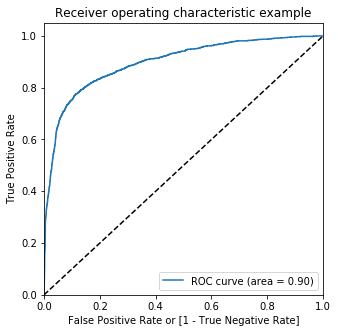

In [116]:
#drav roc-curve
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [117]:
#create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.048490,50057,0,1,0,0,0,0,0,0,0,0,0
1,0,0.069032,18658,0,1,0,0,0,0,0,0,0,0,0
2,0,0.026245,4697,0,1,0,0,0,0,0,0,0,0,0
3,0,0.001155,15253,0,1,0,0,0,0,0,0,0,0,0
4,1,0.094630,39182,0,1,0,0,0,0,0,0,0,0,0


In [118]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.083198  1.000000  0.000000
0.1   0.1  0.850214  0.800915  0.854688
0.2   0.2  0.914136  0.702517  0.933340
0.3   0.3  0.932366  0.523455  0.969474
0.4   0.4  0.934650  0.396453  0.983491
0.5   0.5  0.936364  0.344394  0.990084
0.6   0.6  0.936221  0.307780  0.993251
0.7   0.7  0.936221  0.296911  0.994237
0.8   0.8  0.924607  0.115561  0.998027
0.9   0.9  0.918087  0.018879  0.999689


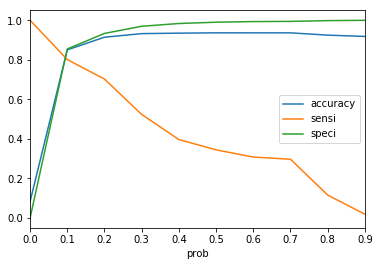

In [119]:
#plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [120]:
#predicted churn/non-churn for various cut-offs
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.09 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.048490,50057,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.069032,18658,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.026245,4697,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.001155,15253,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.094630,39182,0,1,0,0,0,0,0,0,0,0,0,1


In [121]:
#overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8368396001903855

In [122]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[16162,  3100],
       [  328,  1420]], dtype=int64)

In [123]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [124]:
#sensitivity of the logistic regression model
TP / float(TP+FN)

0.8123569794050344

In [125]:
#specificity
TN / float(TN+FP)

0.8390613643443049

In [126]:
# false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.16093863565569516


In [127]:
# Positive predictive value 
print (TP / float(TP+FP))

0.3141592920353982


In [128]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9801091570648878


In [129]:
from sklearn.metrics import precision_score, recall_score

In [130]:
#precision
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.7591424968474149

In [131]:
#recall
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.34439359267734554

In [132]:
from sklearn.metrics import precision_recall_curve

In [133]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0        0
 1        0
 2        0
 3        0
 4        1
 5        0
 6        0
 7        0
 8        0
 9        0
 10       0
 11       0
 12       0
 13       0
 14       0
 15       1
 16       0
 17       0
 18       0
 19       0
 20       0
 21       0
 22       0
 23       0
 24       0
 25       1
 26       1
 27       1
 28       0
 29       1
         ..
 20980    0
 20981    0
 20982    0
 20983    0
 20984    1
 20985    0
 20986    0
 20987    0
 20988    0
 20989    0
 20990    0
 20991    0
 20992    0
 20993    0
 20994    1
 20995    0
 20996    0
 20997    0
 20998    0
 20999    0
 21000    0
 21001    0
 21002    0
 21003    0
 21004    0
 21005    0
 21006    0
 21007    0
 21008    0
 21009    0
 Name: Churn, Length: 21010, dtype: int32, 0        0
 1        0
 2        0
 3        0
 4        0
 5        0
 6        0
 7        0
 8        0
 9        0
 10       0
 11       0
 12       0
 13       0
 14       0
 15       0
 16       0
 17       0
 18       

In [134]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

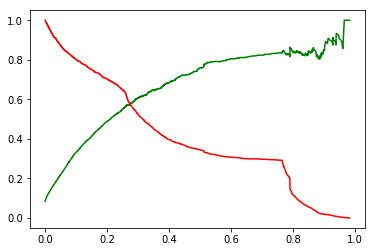

In [135]:
#precision-recall tradeoff
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Testing model

In [136]:
#scale test set
cols1 = X_train.columns.difference(['total_ic_mou_decrease_avg(6,7)_8', 'total_og_mou_decrease_avg(6,7)_8',
                                   'vol_2g_mb_decrease_avg(6,7)_8', 'vol_3g_mb_decrease_avg(6,7)_8', 'total_rech_amt_decrease_avg(6,7)_8'])
X_test[cols1] = scaler.transform(X_test[cols1])

In [137]:
#have columns present in the model
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test)

In [138]:
#predict using the model
y_test_pred = res.predict(X_test_sm)

In [139]:
y_test_pred[:10]

56614    0.207172
83708    0.049934
20895    0.029647
91475    0.007473
1993     0.000181
48320    0.236269
39878    0.293664
39092    0.000022
89843    0.040509
63129    0.072823
dtype: float64

In [140]:
#converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [141]:
y_pred_1.head()

,0
56614,0.207172
83708,0.049934
20895,0.029647
91475,0.007473
1993,0.000181


In [142]:
#converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [143]:
#cutting CustID to index
y_test_df['CustID'] = y_test_df.index

In [144]:
#removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [145]:
#appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [146]:
y_pred_final.head()

,churn,CustID,0
0,1,56614,0.207172
1,0,83708,0.049934
2,0,20895,0.029647
3,0,91475,0.007473
4,0,1993,0.000181


In [147]:
#renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [148]:
y_pred_final.head()

,churn,CustID,Churn_Prob
0,1,56614,0.207172
1,0,83708,0.049934
2,0,20895,0.029647
3,0,91475,0.007473
4,0,1993,0.000181


In [149]:
#assiging churn/non-churn with cutoff 0.09
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.09 else 0)

In [150]:
y_pred_final.head()

,churn,CustID,Churn_Prob,final_predicted
0,1,56614,0.207172,1
1,0,83708,0.049934,0
2,0,20895,0.029647,0
3,0,91475,0.007473,0
4,0,1993,0.000181,0


In [151]:
#overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.8384230982787341

In [152]:
#confustion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[6996, 1297],
       [ 158,  554]], dtype=int64)

In [153]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [154]:
#sensitivity of the logistic regression model
TP / float(TP+FN)

0.7780898876404494

In [155]:
#specificity
TN / float(TN+FP)

0.8436030387073435

## Splitting and scaling data

In [156]:
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [157]:
#import standard scaler and scale columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols1 = X_train.columns.difference(['total_ic_mou_decrease_avg(6,7)_8', 'total_og_mou_decrease_avg(6,7)_8',
                                   'vol_2g_mb_decrease_avg(6,7)_8', 'vol_3g_mb_decrease_avg(6,7)_8', 'total_rech_amt_decrease_avg(6,7)_8'])
X_train[cols1] = scaler.fit_transform(X_train[cols1])

X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,"total_ic_mou_decrease_avg(6,7)_8","total_og_mou_decrease_avg(6,7)_8","vol_2g_mb_decrease_avg(6,7)_8","vol_3g_mb_decrease_avg(6,7)_8","total_rech_amt_decrease_avg(6,7)_8"
50057,0.0,0.0,0.0,0.246485,-0.373561,0.292190,-0.425373,-0.501705,-0.411719,-0.151731,...,-0.886232,-0.438658,-0.436938,-0.331812,-0.212764,1,0,1,1,0
18658,0.0,0.0,0.0,-0.358691,-0.897514,-0.841638,-0.583156,-0.596806,-0.598902,-0.799489,...,-0.269273,-0.438658,-0.436938,-0.419121,-0.212764,1,1,1,1,1
4697,0.0,0.0,0.0,-0.827150,-1.381860,-0.650990,-0.661411,-0.657619,-0.601674,-0.910630,...,-0.807691,2.282988,-0.436938,4.922347,-0.212764,0,0,0,1,0
15253,0.0,0.0,0.0,-0.729315,-0.860728,-0.027488,-0.434441,-0.522554,-0.391428,-0.590678,...,-0.785989,1.385693,-0.234895,-0.066780,-0.212764,0,0,0,0,0
39182,0.0,0.0,0.0,0.014129,-0.265735,-0.994906,-0.496251,-0.633137,-0.578359,0.096162,...,-0.561734,3.169611,5.114198,3.264621,-0.212764,1,1,0,1,1


## PCA

In [158]:
#importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

In [159]:
#apply PCA
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [160]:
pca.components_

array([[-2.14299572e-19,  5.55111512e-17, -0.00000000e+00, ...,
        -3.07125584e-02, -3.80133604e-02, -3.91396860e-03],
       [-5.72159368e-20,  4.16333634e-17,  2.77555756e-17, ...,
        -8.25872487e-03, -1.12544089e-02, -1.90342707e-02],
       [-4.26643894e-19,  1.66533454e-16,  1.11022302e-16, ...,
        -4.05033505e-03, -7.73284442e-03, -1.71559473e-02],
       ...,
       [ 0.00000000e+00,  3.81479866e-03,  2.16620604e-02, ...,
         3.24718551e-17, -1.36338423e-16,  8.15320034e-17],
       [ 9.99999987e-01, -1.62399856e-04,  7.45540009e-06, ...,
        -7.14048775e-19, -9.36818440e-19,  5.14318406e-18],
       [ 0.00000000e+00, -4.46770909e-02, -2.91557952e-02, ...,
        -9.97465999e-17,  1.19587500e-16, -4.51028104e-17]])

In [161]:
pca.explained_variance_ratio_

array([1.26002499e-01, 9.99282358e-02, 6.89280077e-02, 5.73477599e-02,
       4.11995866e-02, 3.51301271e-02, 3.02236469e-02, 2.67037436e-02,
       2.51394612e-02, 2.33429465e-02, 2.27064915e-02, 1.95088306e-02,
       1.86489749e-02, 1.70410435e-02, 1.59627623e-02, 1.50154952e-02,
       1.45232876e-02, 1.43844335e-02, 1.42337089e-02, 1.27274261e-02,
       1.14013068e-02, 1.08875737e-02, 1.06332686e-02, 9.05697518e-03,
       8.65627482e-03, 8.56639637e-03, 8.35854039e-03, 8.11561951e-03,
       7.88990390e-03, 7.45292452e-03, 7.06718323e-03, 6.93189970e-03,
       6.78813083e-03, 5.96501327e-03, 5.77406569e-03, 5.75206611e-03,
       5.62978781e-03, 5.52421140e-03, 5.35129257e-03, 5.21481566e-03,
       5.16474499e-03, 4.87905305e-03, 4.79356411e-03, 4.63401847e-03,
       4.46815980e-03, 4.30372205e-03, 4.22579855e-03, 4.03946773e-03,
       3.88154760e-03, 3.80542949e-03, 3.65972858e-03, 3.58695901e-03,
       3.55667980e-03, 3.44745035e-03, 3.29026135e-03, 3.20230203e-03,
      

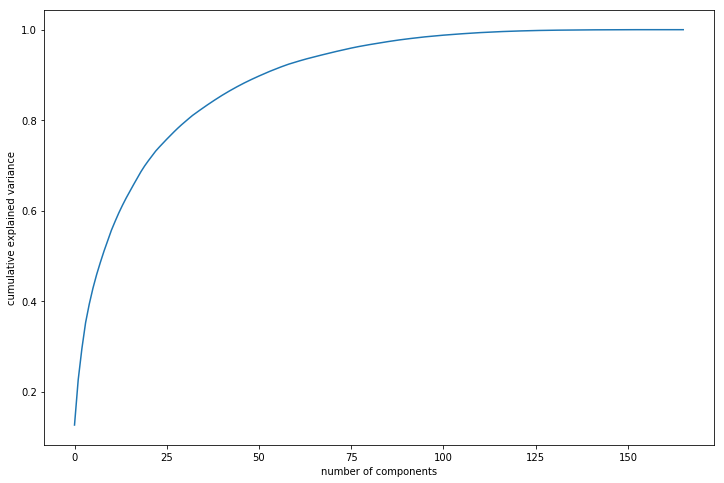

In [162]:
#Plotting the scree plot
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [163]:
#pca with variance 90%
pca = PCA(0.90)

In [164]:
df_train_pca = pca.fit_transform(X_train)

In [165]:
df_train_pca.shape

(21010, 52)

## Logistic Regression with PCA

In [166]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(class_weight='balanced')

In [167]:
#build logistic regression model
lm_model_pca = lm.fit(df_train_pca, y_train)

In [168]:
#predict probabilities using built model
y_train_pred = lm_model_pca.predict_proba(df_train_pca)[:,1]
y_train_pred

array([0.25218198, 0.34881097, 0.03699539, ..., 0.03456289, 0.12067084,
       0.42988455])

In [169]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,churn,churn_Prob,CustID
0,0,0.252182,50057
1,0,0.348811,18658
2,0,0.036995,4697
3,0,0.040841,15253
4,1,0.757394,39182


In [170]:
#assign churn/non-churn with cutoof 0.5
y_train_pred_final['predicted'] = y_train_pred_final.churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_Prob,CustID,predicted
0,0,0.252182,50057,0
1,0,0.348811,18658,0
2,0,0.036995,4697,0
3,0,0.040841,15253,0
4,1,0.757394,39182,1


In [171]:
#confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.predicted )
print(confusion)

[[16128  3134]
 [  287  1461]]


In [172]:
#overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.predicted))

0.8371727748691099


In [173]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [174]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churn, y_train_pred_final.churn_Prob, drop_intermediate = False )

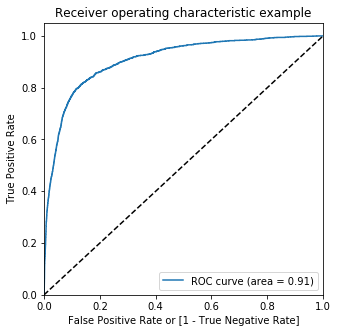

In [175]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_Prob)

In [176]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,churn,churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.252182,50057,0,1,1,1,0,0,0,0,0,0,0
1,0,0.348811,18658,0,1,1,1,1,0,0,0,0,0,0
2,0,0.036995,4697,0,1,0,0,0,0,0,0,0,0,0
3,0,0.040841,15253,0,1,0,0,0,0,0,0,0,0,0
4,1,0.757394,39182,1,1,1,1,1,1,1,1,1,0,0


In [177]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.083198  1.000000  0.000000
0.1   0.1  0.432413  0.977689  0.382930
0.2   0.2  0.594193  0.952517  0.561676
0.3   0.3  0.702951  0.915904  0.683626
0.4   0.4  0.778677  0.875286  0.769910
0.5   0.5  0.837173  0.835812  0.837296
0.6   0.6  0.880343  0.788330  0.888693
0.7   0.7  0.910424  0.701945  0.929343
0.8   0.8  0.924655  0.554348  0.958260
0.9   0.9  0.933317  0.395309  0.982141


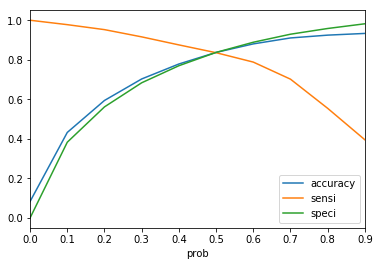

In [178]:
#plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [179]:
#assign churn/non-churn with cut-off 0.49
y_train_pred_final['final_predicted'] = y_train_pred_final.churn_Prob.map( lambda x: 1 if x > 0.49 else 0)

y_train_pred_final.head()

,churn,churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.252182,50057,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.348811,18658,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.036995,4697,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.040841,15253,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.757394,39182,1,1,1,1,1,1,1,1,1,0,0,1


In [180]:
#overall accuracy.
metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)

0.8325083293669681

In [181]:
#confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted )
confusion2

array([[16024,  3238],
       [  281,  1467]], dtype=int64)

In [182]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [183]:
#sensitivity of the logistic regression model
TP / float(TP+FN)

0.8392448512585813

In [184]:
#specificity
TN / float(TN+FP)

0.8318969992731804

In [185]:
precision_score(y_train_pred_final.churn, y_train_pred_final.predicted)

0.31795429815016324

In [186]:
recall_score(y_train_pred_final.churn, y_train_pred_final.predicted)

0.835812356979405

In [187]:
y_train_pred_final.churn, y_train_pred_final.predicted

(0        0
 1        0
 2        0
 3        0
 4        1
 5        0
 6        0
 7        0
 8        0
 9        0
 10       0
 11       0
 12       0
 13       0
 14       0
 15       1
 16       0
 17       0
 18       0
 19       0
 20       0
 21       0
 22       0
 23       0
 24       0
 25       1
 26       1
 27       1
 28       0
 29       1
         ..
 20980    0
 20981    0
 20982    0
 20983    0
 20984    1
 20985    0
 20986    0
 20987    0
 20988    0
 20989    0
 20990    0
 20991    0
 20992    0
 20993    0
 20994    1
 20995    0
 20996    0
 20997    0
 20998    0
 20999    0
 21000    0
 21001    0
 21002    0
 21003    0
 21004    0
 21005    0
 21006    0
 21007    0
 21008    0
 21009    0
 Name: churn, Length: 21010, dtype: int32, 0        0
 1        0
 2        0
 3        0
 4        1
 5        0
 6        0
 7        0
 8        1
 9        0
 10       0
 11       1
 12       0
 13       0
 14       1
 15       1
 16       0
 17       0
 18       

In [188]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.churn, y_train_pred_final.churn_Prob)

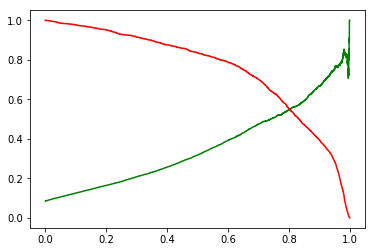

In [189]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [190]:
#scale test set
X_test[cols1] = scaler.transform(X_test[cols1])

In [191]:
#pca transform test set
df_test_pca = pca.transform(X_test)

In [192]:
df_test_pca

array([[-1.05430621, -4.14385954, -1.89172634, ..., -0.16130899,
        -0.2887051 , -0.11849174],
       [ 6.09067289, -4.31301686,  0.15837083, ...,  0.33780113,
        -0.00984847, -0.12971925],
       [ 1.94867776, -0.4664043 , -0.06449524, ..., -0.7446259 ,
         0.14849191,  0.89404863],
       ...,
       [-1.58670823, -4.90462938, -0.8235394 , ..., -0.26105455,
         0.44915009,  0.67638614],
       [-3.58555211, -1.66482789,  4.63860139, ...,  1.28197214,
        -1.03270031,  1.74523437],
       [ 1.33856143, -4.09880423, -2.78410339, ...,  0.47875441,
        -0.76621542, -0.78858559]])

In [193]:
#predict probabilities on test set
y_test_pred = lm_model_pca.predict_proba(df_test_pca)[:,1]

In [194]:
y_test_pred[:10]

array([0.67170308, 0.20175327, 0.14402926, 0.101291  , 0.00422143,
       0.66183167, 0.78672312, 0.00111007, 0.1280135 , 0.48351569])

In [195]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['CustID'] = y_test.index
y_test_pred_final.head()

,Churn,Churn_Prob,CustID
0,1,0.671703,56614
1,0,0.201753,83708
2,0,0.144029,20895
3,0,0.101291,91475
4,0,0.004221,1993


In [196]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.49 else 0)

In [197]:
y_test_pred_final.head()

,Churn,Churn_Prob,CustID,final_predicted
0,1,0.671703,56614,1
1,0,0.201753,83708,0
2,0,0.144029,20895,0
3,0,0.101291,91475,0
4,0,0.004221,1993,0


In [198]:
#overall accuracy.
metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.final_predicted)

0.8372015546918379

In [199]:
#confusion matrix
confusion2 = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.final_predicted )
confusion2

array([[6959, 1334],
       [ 132,  580]], dtype=int64)

In [200]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [201]:
#sensitivity of the logistic regression model
TP / float(TP+FN)

0.8146067415730337

In [202]:
#specificity
TN / float(TN+FP)

0.8391414445918244

## Random Forest with PCA

In [203]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

In [204]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [205]:
# Making predictions
predictions = rfc.predict(df_test_pca)

In [206]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [207]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      8293
           1       0.76      0.26      0.39       712

    accuracy                           0.94      9005
   macro avg       0.85      0.63      0.68      9005
weighted avg       0.93      0.94      0.92      9005



In [208]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[8234   59]
 [ 525  187]]


In [210]:
# GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [213]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [10,50,100,200, 300], 
    'max_features': [5, 10, 20, 30, 40, 50, 60]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [214]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 420 candidates, totalling 1260 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 57.0min
[Parallel(n_jobs=-1)]: Done 1260 out of 1260 | elapsed: 59.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [215]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.943312612834417 using {'max_depth': 4, 'max_features': 40, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [221]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=40,
                             n_estimators=300)

In [222]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=40,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [223]:
# predict
predictions = rfc.predict(X_test)

In [224]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8293
           1       0.74      0.46      0.57       712

    accuracy                           0.94      9005
   macro avg       0.85      0.72      0.77      9005
weighted avg       0.94      0.94      0.94      9005



In [225]:
#confusion matrix
print(confusion_matrix(y_test,predictions))

[[8180  113]
 [ 387  325]]


## Conclusion

Of the two models that use PCA (logistic regression and Random forest) the logistic regression model is a better choice as there is a better tradeoff between specificity and sensitivity and also there are less non-churn customers predicted as churn and majority of the churn customers are predicted as churn.

The top features which have a positive impact on the churn of a customer (High the value of these more the chances of churn) are:
1. onnet_mou_7
2. offnet_mou_7
3. total_ic_mou_decrease_avg(6,7)_8 - derived variable
4. vol_3g_mb_decrease_avg(6,7)_8 - derived variable

The top features which have a negative impact on the Sale Price of a property (High the value of these more the chances of churn) are:
1. loc_og_t2t_mou_8
2. loc_og_t2m_mou_8
3. std_og_t2t_mou_8
4. std_og_t2m_mou_8
5. loc_ic_t2m_mou_8
6. spl_ic_mou_8
7. last_day_rch_amt_8
8. fb_user_8
9. sep_vbc_3g

## Recommendations

1. std_og_t2m_mou_8 is highly negatively correlated with customer churn which might be due to other operators providing lower rates for connecting calls between their network. Provide offers in accordance to cometitors prices for these customers.
2. total_ic_mou_decrease_avg(6,7)_8 is strongly positively correlated with customer churn. Whenever any high valued customer's current month total_ic_mou reduces when compared to the average total_ic_mou of previous 2 months then there is a very high possibility that the customer might churn. Reaching out to the customer and providing offers might help retain customer.